In [218]:
# !unzip 1.zip

#                        AirBnB
### Data Analysis and visualization

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [220]:
data=pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [221]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last_review and reviews_per_month seems to have very much null values. So let's drop this column.

In [222]:
data.drop(["last_review","reviews_per_month"],axis=1,inplace=True)

In [223]:
df=data.dropna()
df[["name","host_name"]].describe()

,name,host_name
count,48858,48858
unique,47884,11450
top,Hillside Hotel,Michael
freq,18,417


the important features will be
**min_nights, neighbourhood_group, number_of_review,room_type,calculated_host_listings_count**

In [224]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [226]:
df=data.dropna()
print(len(np.unique(df["host_name"])),len(np.unique(df["name"])))

11450 47884


**host_name and name** have many NaN values let us fill them with some other strings. Dropping these rows will not be useful.

In [227]:
data["host_name"]=data["host_name"].fillna("Other")

In [228]:
data["name"]=data["name"].fillna("NaN")

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

Create a two lists
1. **categorical** : contains names of categorical columns
2. **numerical** : contains names of numerical columns

In [230]:
 ategorical=["name","host_name","neighbourhood_group","neighbourhood","room_type"]
numerical=data.columns ^ categorical
print(numerical,categorical,sep="\n")

Index(['availability_365', 'calculated_host_listings_count', 'host_id', 'id',
       'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'price'],
      dtype='object')
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [231]:
data[numerical].describe()

,availability_365,calculated_host_listings_count,host_id,id,latitude,longitude,minimum_nights,number_of_reviews,price
count,48895.000000,48895.000000,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,112.781327,7.143982,6.762001e+07,1.901714e+07,40.728949,-73.952170,7.029962,23.274466,152.720687
std,131.622289,32.952519,7.861097e+07,1.098311e+07,0.054530,0.046157,20.510550,44.550582,240.154170
min,0.000000,1.000000,2.438000e+03,2.539000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000
25%,0.000000,1.000000,7.822033e+06,9.471945e+06,40.690100,-73.983070,1.000000,1.000000,69.000000
50%,45.000000,1.000000,3.079382e+07,1.967728e+07,40.723070,-73.955680,3.000000,5.000000,106.000000
75%,227.000000,2.000000,1.074344e+08,2.915218e+07,40.763115,-73.936275,5.000000,24.000000,175.000000
max,365.000000,327.000000,2.743213e+08,3.648724e+07,40.913060,-73.712990,1250.000000,629.000000,10000.000000


* **minimum_nights**: 75% value  is 5 but max value is 1250 so it contains some high outliers.
* **price**: Price seems an avg of 152 but it also have some outliers (it is expected though).
* **availability_365**: It seems to have lesser vairance but here value 0 is 25% times.

In [232]:
data[categorical].describe().head(4)

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895,48895,48895
unique,47906,11453,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21661,3920,25409


* for classification analysis **neighbourhood_group and room_type** are good feature.
* **name and  host_name** does not seems to be much useful.

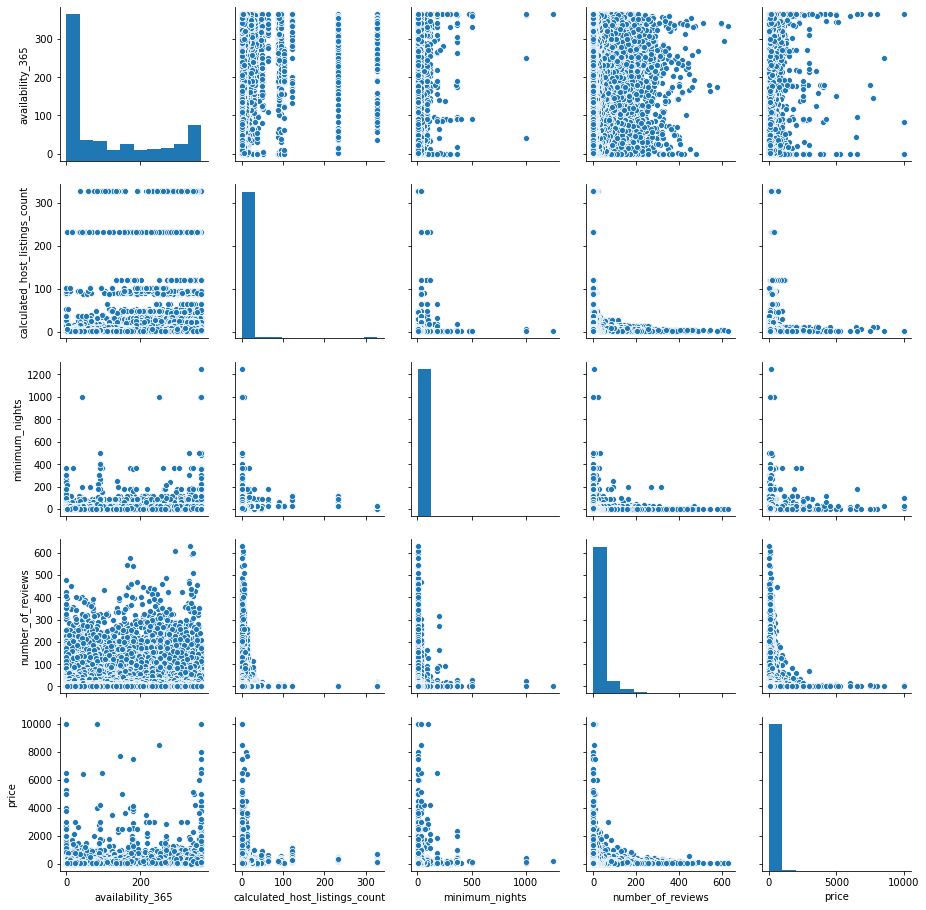

In [233]:
cols=["availability_365","calculated_host_listings_count","minimum_nights","number_of_reviews","price"]


sns.pairplot(data[cols])

* Data seems to be more variant
* availability_365 with price have large number of oytliers
* number of reviews is more as prices is low


---
# ROOM TYPE
 there are 3 types of rooms in our dataset and these are 
 1. **Private room**
 2. **Entire home/apt**
 3. **Shared room**

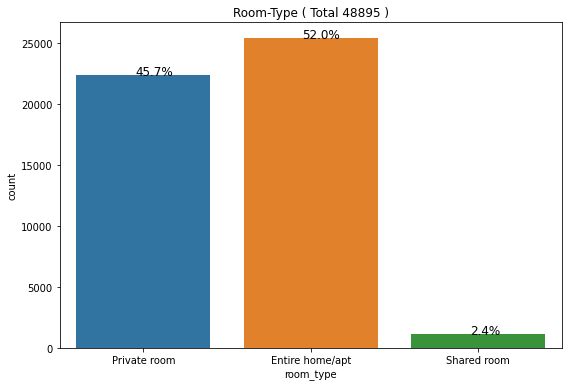

In [234]:
# room_type
fig,ax=plt.subplots(1,1,figsize=(9,6))
df=data["room_type"]
sns.countplot(df,ax=ax)
ax.set_title("Room_Type");
total=df.shape[0]

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y),size=12)
    
ax.set_title("Room-Type"+" ( Total "+str(total)+" )");


In NYC, **Entire home/apt room_type** is in very much use .
**Private room** have little lower counts but not so much lower tha entier home/apt  . It seems that shared room us not much popular in nyc.

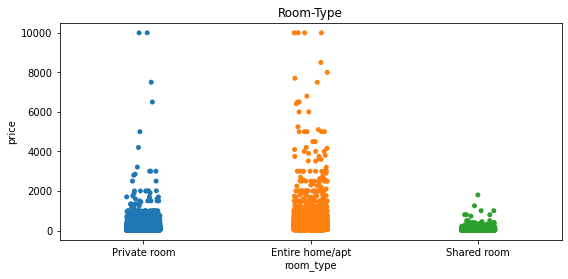

In [235]:
fig,ax=plt.subplots(1,1,figsize=(9,4))
sns.stripplot(y="price",data=data,x="room_type");
ax.set_title("Room-Type");

* Entier home/apt type have high variance in price.
* Private room seems to have lower number of outliers.
* Shared room have lowest variance.



---

# Neighbourhood_Group
There are 5 neighbourhood_group in this dataset and these are:
1. Brooklyn
2. Manhattan
3. Queens
4. Staten Island
5. Bronx


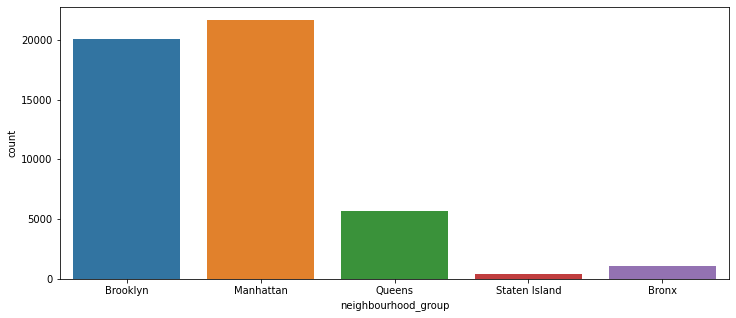

In [236]:
fig,ax=plt.subplots(1,1,figsize=(12,5))

df=data
sns.countplot(df["neighbourhood_group"],ax=ax);

In manhattan and brooklyn airbnb is used very much as compare to others.


---

## neighbourhood_group with room_type
Here, it shows every neighbourhood_group with counts of different room_types. 

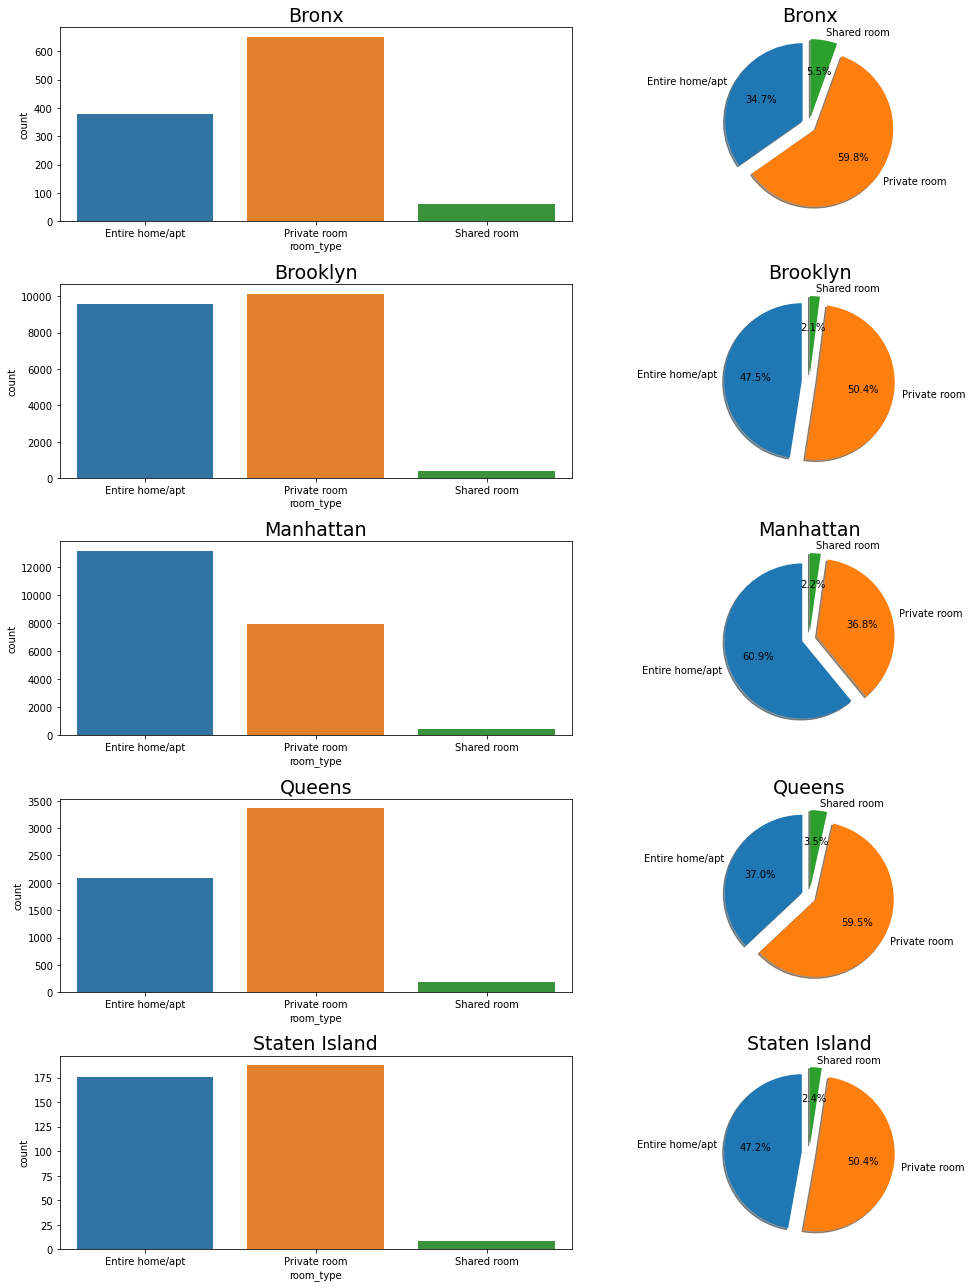

In [237]:
fig,ax=plt.subplots(5,2,figsize=(15,18));
cols=np.unique(data["neighbourhood_group"])
labels=np.unique(data["room_type"])
index=0
explode=[0.1]*3

for i in range(5):
  ax[i][0].set_title(cols[index],fontsize=19);
  ax[i][1].set_title(cols[index],fontsize=19);
  df=data.loc[data["neighbourhood_group"]==cols[index]]
  sns.countplot(df["room_type"],ax=ax[i][0],order=labels)
  total_room_types=df["room_type"].shape[0]
  sizes=[df.loc[df["room_type"]==i].shape[0]/total_room_types for i in labels]
  ax[i][1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)  

  index+=1


fig.tight_layout();



other than manhattan all neighbourhood group follows the same pattern



---

# Price

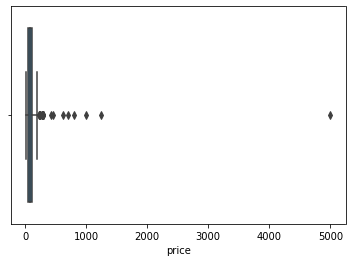

In [239]:
sns.boxplot(df["price"])

 it seems useful to use price less than 500 as it have some high value outliers.



---

### Price Range in diiferent neighbourhood_groups

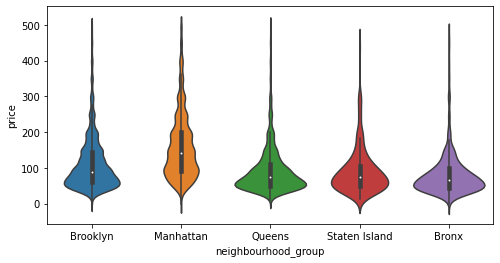

In [253]:
fig,ax=plt.subplots(1,1,figsize=(8,4))

df=data.loc[data["price"]<500]
sns.violinplot("neighbourhood_group","price",data=df,ax=ax)

## Price distribution in neighbourhood_group with room _types
It shows distribution of prices with room types in different neighbourhood groups.
Red line denotes the common price where all types of rooms are available in specific neighbourhood group. 

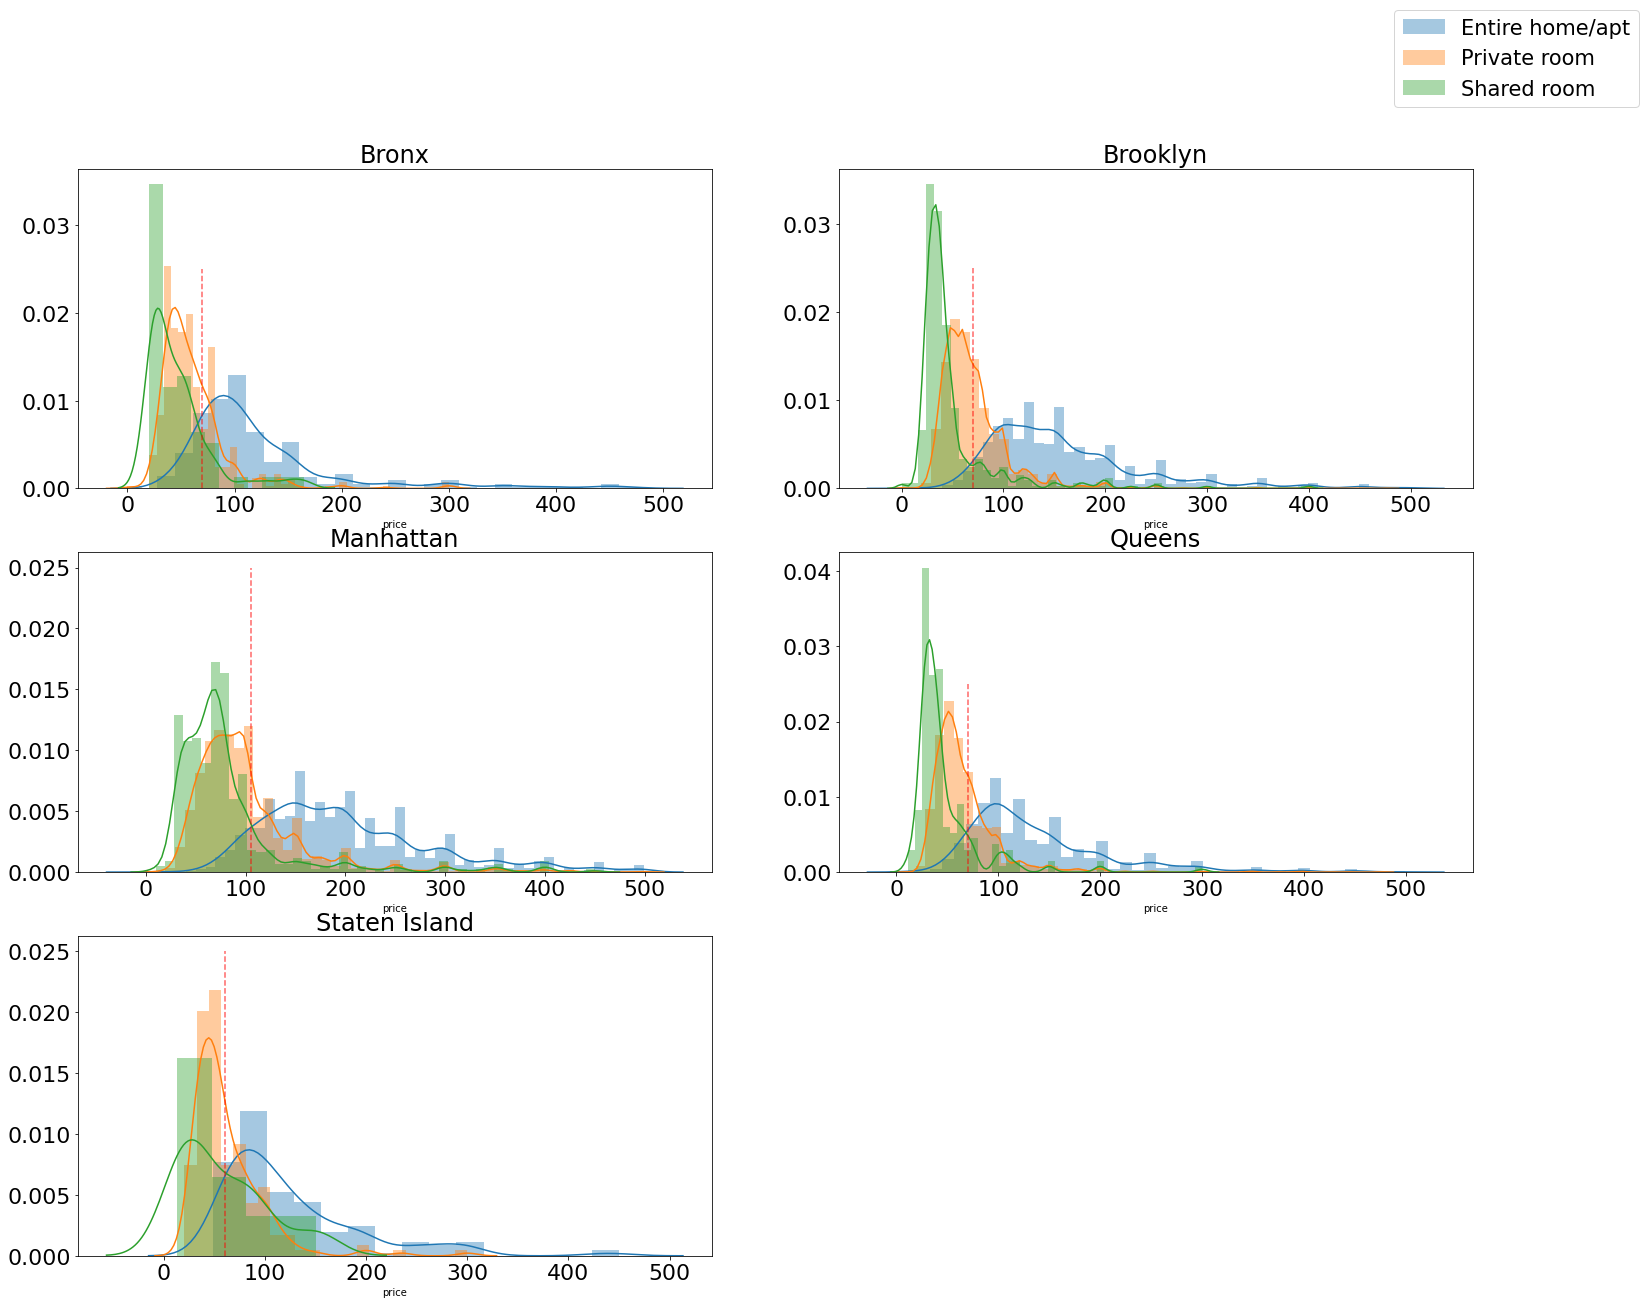

In [241]:
fig,ax=plt.subplots(3,2,figsize=(25,20))
df=data.loc[data["price"]<500]

index=0
for r in range(3):
    for c in range(2):
        if(index==5):
            break
        ddf=df.loc[df["neighbourhood_group"]==cols[index]]
        ax[r][c].set_title(cols[index],fontsize=24)
        ax[r][c].xaxis.set_tick_params(labelsize=22)
        ax[r][c].yaxis.set_tick_params(labelsize=22)
        

        for i in range(3):
            sns.distplot(ddf.loc[ddf["room_type"]==labels[i]]["price"],label=labels[i],ax=ax[r][c])
        index+=1    


ax[-1, -1].axis('off')

fig.legend(labels,fontsize=21);


ax[0][0].plot([70,70 ],[0,0.025],"r--",alpha=0.6);

ax[0][1].plot([70,70 ],[0,0.025],"r--",alpha=0.6);

ax[1][0].plot([105,105 ],[0,0.025],"r--",alpha=0.6);

ax[1][1].plot([70,70 ],[0,0.025],"r--",alpha=0.6);

ax[2][0].plot([60,60 ],[0,0.025],"r--",alpha=0.6);

* Red line  are common price at which we can get evey room_type in specific areas

* in some places shared rooms seems to have lower prices while entire/home apt have high prices in all palces
* pvt room have avg prices and in state island there are in high numbers



---

# Min_nights

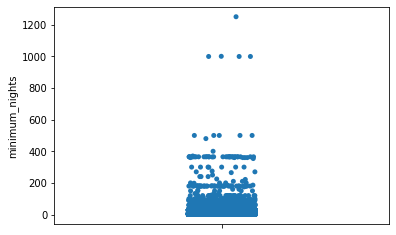

In [243]:
#min nights
# df=data.loc[data["minimum_nights"]<730]
sns.stripplot(y=data["minimum_nights"])

In [244]:
# this more lies in range 0 - 600

(-1.0, 570.0)

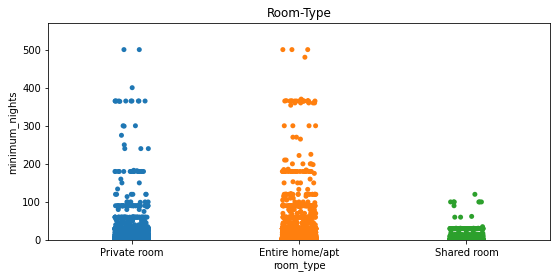

In [245]:
fig,ax=plt.subplots(1,1,figsize=(9,4))
sns.stripplot(y="minimum_nights",data=data,x="room_type");
ax.set_title("Room-Type");
plt.ylim([-1,570])

(0.0, 570.0)

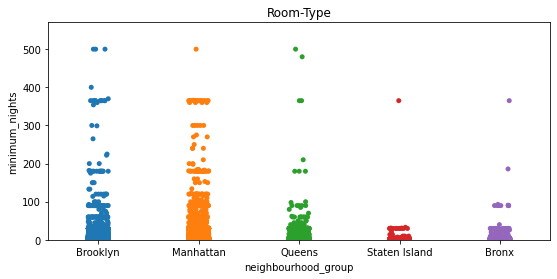

In [246]:
fig,ax=plt.subplots(1,1,figsize=(9,4))
sns.stripplot(y="minimum_nights",data=data,x="neighbourhood_group");
ax.set_title("Room-Type");
plt.ylim([0,570])

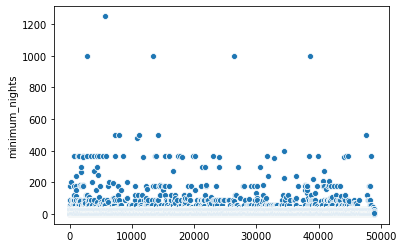

In [247]:
df=data["minimum_nights"]
sns.scatterplot(y=df,x=df.index);

(0.0, 570.0)

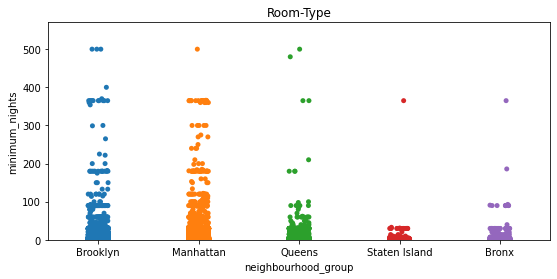

In [248]:
fig,ax=plt.subplots(1,1,figsize=(9,4))
sns.stripplot(y="minimum_nights",data=data,x="neighbourhood_group");
ax.set_title("Room-Type");
plt.ylim([0,570])

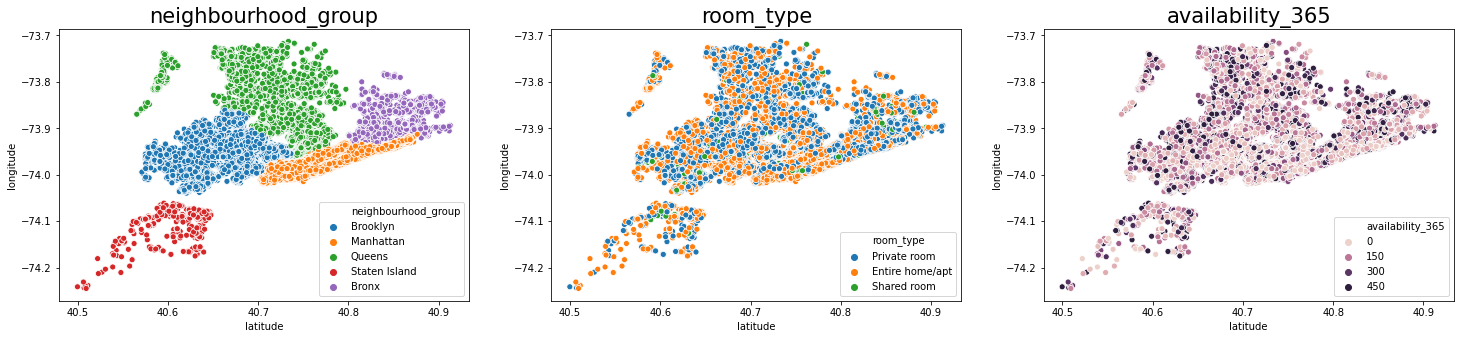

In [249]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
map_cols=["neighbourhood_group","room_type","availability_365"]
for i in range(3):
  ax[i].set_title(map_cols[i],fontsize=21)
  sns.scatterplot(hue=map_cols[i],x="latitude",y="longitude",data=data,ax=ax[i])